<a href="https://colab.research.google.com/github/HarshSangrulkar/SmartInternz-AI-ML/blob/main/CNN_Image_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d saumyamohandas/animal-dataset

 74% 46.0M/62.3M [00:00<00:00, 90.7MB/s]
100% 62.3M/62.3M [00:00<00:00, 105MB/s] 


In [ ]:
!unzip /content/animal-dataset.zip

Archive:  /content/animal-dataset.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  in


Data Augmentation

In [ ]:
# import the nececessary lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data augmentation for the training variable

train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)

In [ ]:
# data augmentation for the testing variable

test_datagen = ImageDataGenerator(rescale =1./255)

In [ ]:
# data augmentation on the training data

In [ ]:
x_train = train_datagen.flow_from_directory('/content/dataset/Training',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 1238 images belonging to 4 classes.


In [ ]:
# data augmentation on the testing data


x_test = test_datagen.flow_from_directory('/content/dataset/Testing',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 326 images belonging to 4 classes.


## CNN Model building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense

In [ ]:
# adding layers

model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))  #convolution layer
model.add(MaxPooling2D(pool_size =(2,2)))  # maxpooling layer
model.add(Flatten())  # flatten layer

model.add(Dense(300,activation ='relu')) # hidden layer 1
model.add(Dense(150,activation ='relu')) # hidden layer 2

model.add(Dense(4,activation ='softmax')) # output layer

In [ ]:
# compile the model
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics =['accuracy'])

In [ ]:
#training the model

model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 20,validation_data = x_test,validation_steps = len(x_test))

<ipython-input-15-51381f8b525c>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 20,validation_data = x_test,validation_steps = len(x_test))


Epoch 1/20
13/13 [==============================] - 7s 473ms/step - loss: 3.0139 - accuracy: 0.2472 - val_loss: 1.5762 - val_accuracy: 0.2607
Epoch 2/20
13/13 [==============================] - 5s 394ms/step - loss: 1.3967 - accuracy: 0.3134 - val_loss: 1.4207 - val_accuracy: 0.2699
Epoch 3/20
13/13 [==============================] - 6s 464ms/step - loss: 1.2112 - accuracy: 0.4717 - val_loss: 1.0523 - val_accuracy: 0.6043
Epoch 4/20
13/13 [==============================] - 5s 381ms/step - loss: 1.0370 - accuracy: 0.5638 - val_loss: 1.1083 - val_accuracy: 0.4939
Epoch 5/20
13/13 [==============================] - 5s 390ms/step - loss: 0.9250 - accuracy: 0.6325 - val_loss: 0.8265 - val_accuracy: 0.6288
Epoch 6/20
13/13 [==============================] - 6s 462ms/step - loss: 0.7973 - accuracy: 0.6874 - val_loss: 0.7941 - val_accuracy: 0.6902
Epoch 7/20
13/13 [==============================] - 5s 395ms/step - loss: 0.6971 - accuracy: 0.7286 - val_loss: 0.6133 - val_accuracy: 0.7761
Epoch 

In [ ]:
# save the model

model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


test the model

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
# testing 1

img = image.load_img('/content/dataset/Testing/elephants/Z (1).jpeg',target_size =(64,64))

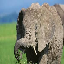

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 79ms/step


'elephants'

In [ ]:
# testing 2
img = image.load_img('/content/dataset/Training/bears/2Q__ (18).jpeg',target_size =(64,64))

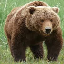

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 18ms/step


'bears'

In [ ]:
#testing 3
img = image.load_img('/content/dataset/Training/crows/Z1  (65).jpg',target_size =(64,64))

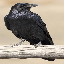

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 18ms/step


'crows'